In [259]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
# Load All Stocks Data
netflix_stock_data = pd.read_csv('../data/nflx_stock_data_cleaned.csv')
cnk_stock_data = pd.read_csv('../data/cnk_stock_data_cleaned.csv')
imax_stock_data = pd.read_csv('../data/imax_stock_data_cleaned.csv')
amc_stock_data = pd.read_csv('../data/amc_stock_data_cleaned.csv')
# Load Box Office Movies Data
movies_data = pd.read_csv('../data/movies_data_cleaned.csv')

## **Stock Trends Analysis**


>#### **Question:**
>What is the average quarterly adjusted closing price and total trading volume for Netflix, AMC, Cinemark, and IMAX over the past 10 years?


In [261]:
def calculate_quarterly_averages(stock_data, stock_name):
    stock_data['date'] = pd.to_datetime(stock_data['date'])
    stock_data.set_index('date', inplace=True)
    quarterly_data = stock_data.resample('QE').agg({
        'adjusted_close': 'mean',
        'volume': 'sum'
    })
    quarterly_data['stock'] = stock_name
    return quarterly_data

In [262]:
netflix_quarterly = calculate_quarterly_averages(netflix_stock_data, 'Netflix')
amc_quarterly = calculate_quarterly_averages(amc_stock_data, 'AMC')
cnk_quarterly = calculate_quarterly_averages(cnk_stock_data, 'Cinemark')
imax_quarterly = calculate_quarterly_averages(imax_stock_data, 'IMAX')

all_quarterly_data = pd.concat([netflix_quarterly, amc_quarterly, cnk_quarterly, imax_quarterly])

In [263]:
print(all_quarterly_data)

                           adjusted_close      volume    stock
date                                                          
2014-03-31 00:00:00+00:00       57.261335  1295042700  Netflix
2014-06-30 00:00:00+00:00       54.112290  1525102600  Netflix
2014-09-30 00:00:00+00:00       64.852589   972458900  Netflix
2014-12-31 00:00:00+00:00       53.690446  1105811000  Netflix
2015-03-31 00:00:00+00:00       60.658946   963482800  Netflix
...                                   ...         ...      ...
2023-09-30 00:00:00+00:00       18.428730    34173100     IMAX
2023-12-31 00:00:00+00:00       17.110635    44764500     IMAX
2024-03-31 00:00:00+00:00       15.196066    50574800     IMAX
2024-06-30 00:00:00+00:00       16.542222    49881700     IMAX
2024-09-30 00:00:00+00:00       17.755714    18669900     IMAX

[172 rows x 3 columns]


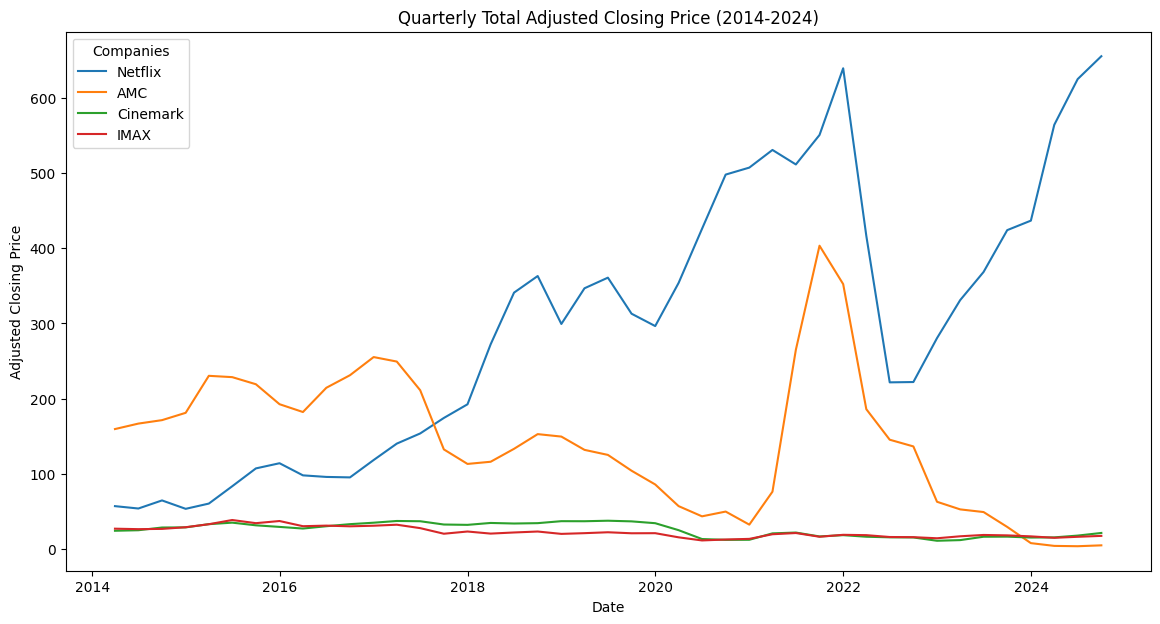

In [264]:
plt.figure(figsize=(14,7))

sns.lineplot(data=netflix_quarterly, x='date', y='adjusted_close', label='Netflix')
sns.lineplot(data=amc_quarterly, x='date', y='adjusted_close', label='AMC')
sns.lineplot(data=cnk_quarterly, x='date', y='adjusted_close', label='Cinemark')
sns.lineplot(data=imax_quarterly, x='date', y='adjusted_close', label='IMAX')

plt.title('Quarterly Total Adjusted Closing Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend(title='Companies')
plt.show()

> #### **Question:**
> Is there a correlation between Netflix’s adjusted close price and the stock prices of AMC, Cinemark, and IMAX?

> #### **Question:**
> For each stock, what were the highest and lowest adjusted close prices, and when did they occur?

>#### **Question:**
>How did the year-over-year (YoY) stock price changes compare between AMC, Cinemark, IMAX, and Netflix?

>#### **Question:**
>Is there a correlation between Netflix’s adjusted close price and the stock prices of AMC, Cinemark, and IMAX?

>#### **Question:**
>Additional question to consider: What was the average daily or monthly volatility for each stock? (This could add depth to the trends section, showcasing how stable or volatile each company’s stock has been relative to others.)

In [235]:
print("Netflix Stock Dataset : ", netflix_stock_data.describe(), "\n")
print("Box Office Dataset: ", movies_data.describe())

Netflix Stock Dataset :         adjusted_close  close_price   high_price    low_price   open_price  \
count     2661.000000  2661.000000  2661.000000  2661.000000  2661.000000   
mean       292.409917   292.409917   296.725978   287.886233   292.379733   
std        178.223110   178.223110   180.541630   175.920308   178.319066   
min         44.887142    44.887142    45.842857    42.785713    44.605713   
25%        116.239998   116.239998   117.879997   113.699997   116.209999   
50%        298.839996   298.839996   305.209991   293.279999   299.500000   
75%        424.450012   424.450012   428.850006   415.980011   424.200012   
max        691.690002   691.690002   700.989990   686.090027   692.349976   

             volume  
count  2.661000e+03  
mean   1.013579e+07  
std    9.067623e+06  
min    1.144000e+06  
25%    4.717100e+06  
50%    7.433900e+06  
75%    1.259580e+07  
max    1.333875e+08   

Box Office Dataset:                year   day_number  top10_gross_dollars     Rel

Check for events in box ticket that contains `covid`

In [236]:
covid_events = movies_data[movies_data['event'].str.contains('covid', case=False, na=False)]
print(covid_events)

      year        date       day  day_number  top10_gross_dollars      %± YD  \
2262  2020  2020-03-12  Thursday          72              5321431  +5,901.2%   
2263  2020  2020-03-13    Friday          73             17977298    +237.8%   
2264  2020  2020-03-14  Saturday          74             19710626      +9.6%   
2265  2020  2020-03-15    Sunday          75             11892439     -39.7%   
2266  2020  2020-03-16    Monday          76              3234151     -72.8%   
...    ...         ...       ...         ...                  ...        ...   
2711  2021  2021-06-10  Thursday         161              4373031        -8%   
2712  2021  2021-06-11    Friday         162             16297784    +272.7%   
2713  2021  2021-06-12  Saturday         163             12757156     -21.7%   
2714  2021  2021-06-13    Sunday         164              9336157     -26.8%   
2715  2021  2021-06-14    Monday         165              4232870     -54.7%   

          %± LW  Releases           top

In [237]:
amc_stock_data['date'] = pd.to_datetime(amc_stock_data['date'])
netflix_stock_data['date'] = pd.to_datetime(netflix_stock_data['date'])
netflix_stock_data.set_index('date', inplace=True)
amc_stock_data.set_index('date', inplace=True)

KeyError: 'date'

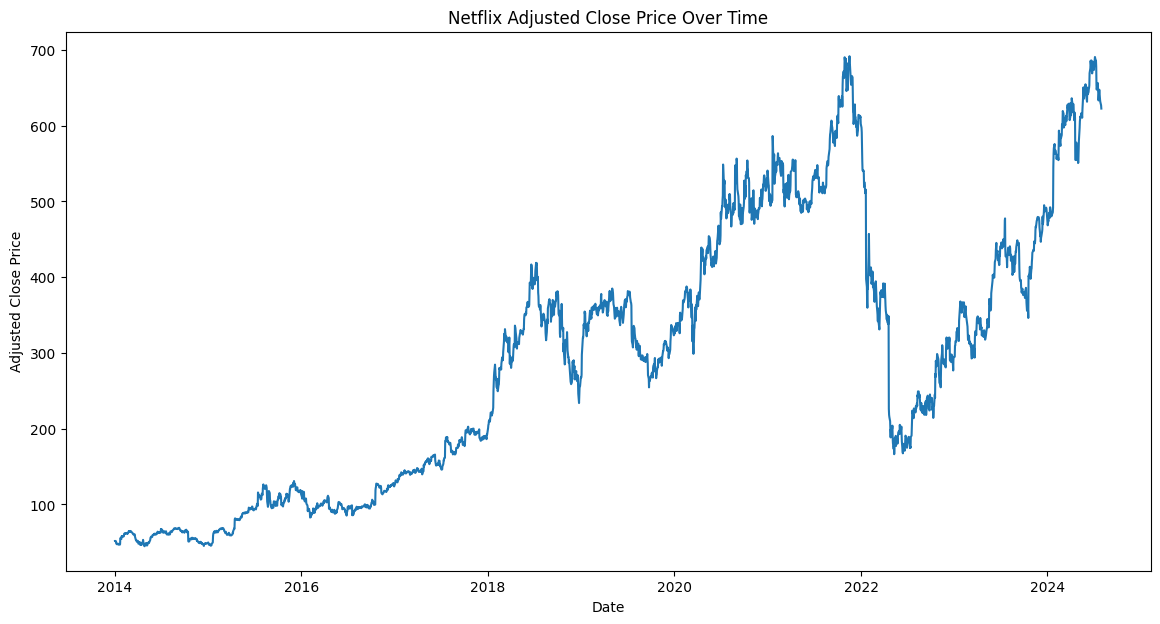

In [238]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=netflix_stock_data, x=netflix_stock_data.index, y='adjusted_close')
plt.title('Netflix Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

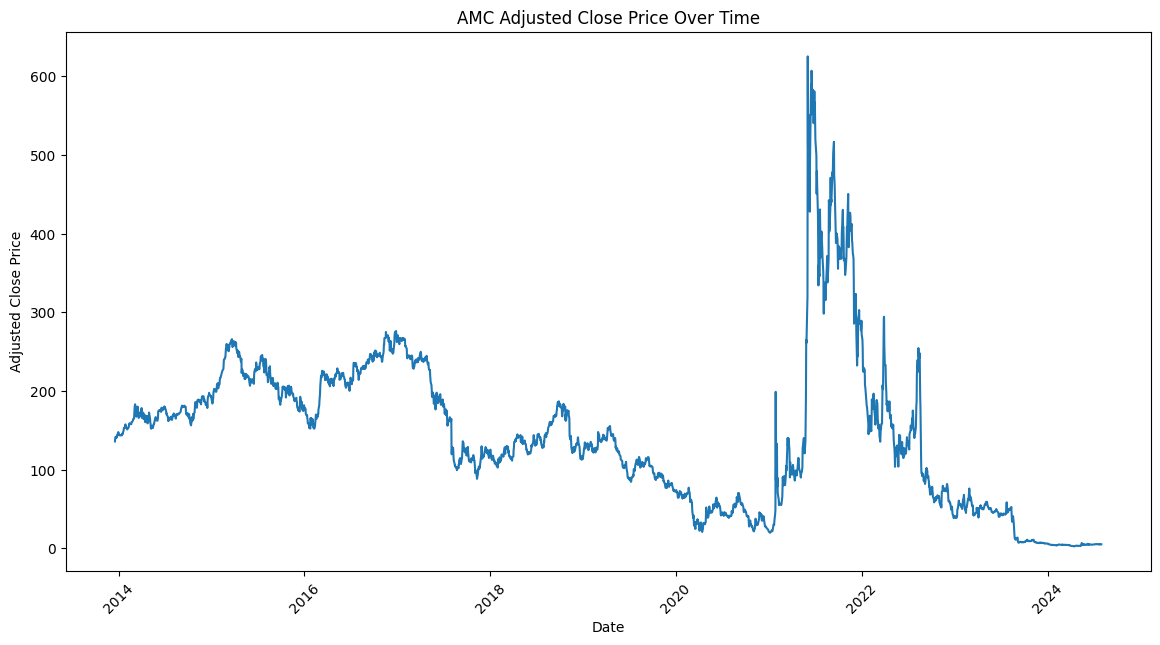

In [239]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=amc_stock_data, x=amc_stock_data.index, y='adjusted_close')
plt.title('AMC Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.xticks(rotation=45)
plt.show()

In [240]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 3951 non-null   int64 
 1   date                 3951 non-null   object
 2   day                  3951 non-null   object
 3   day_number           3951 non-null   int64 
 4   top10_gross_dollars  3951 non-null   int64 
 5   %± YD                3951 non-null   object
 6   %± LW                3951 non-null   object
 7   Releases             3951 non-null   int64 
 8   top1_release         3951 non-null   object
 9   gross_dollars        3951 non-null   int64 
 10  event                708 non-null    object
dtypes: int64(5), object(6)
memory usage: 339.7+ KB


In [241]:
movies_data['date'] = pd.to_datetime(movies_data['date'])
movies_data.set_index('date', inplace=True)
print(type(movies_data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


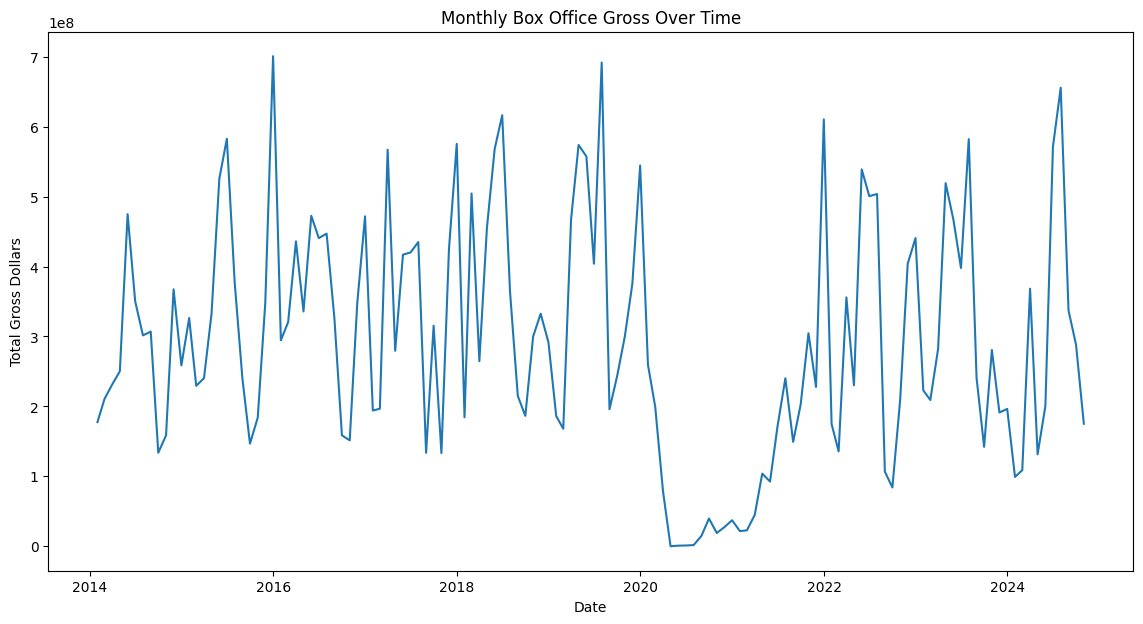

In [243]:
plt.figure(figsize=(14, 7))
monthly_box_office = movies_data['gross_dollars'].resample('ME').sum()
sns.lineplot(x=monthly_box_office.index, y=monthly_box_office)
plt.title('Monthly Box Office Gross Over Time')
plt.xlabel('Date')
plt.ylabel('Total Gross Dollars')
plt.show()